
# Battle of Neighbourhoods - Delhi

## Introduction

In this project we will be analizing the neighbourhoods on the basis of the metro tranis stations located in the city of Delhi.

There are 137 stations in the metro transit in the city of Delhi which is the most densly populated place in India. In this project the stations will be used to understand the city and its neighbourhoods. 

Later on in the project K Means is used to cluster the data.

In [3]:
#!pip install folium

Here the locations and names of the metro station are loaded into a dataframe from a JSON file. The data is refered from https://raw.githubusercontent.com/dhirajt/delhi-metro-stations/master/metro.json, I would like to thank 'dhirajit' for creating the data and publishing it on opensource GitHub for others to use the data. 

In [4]:
from bs4 import BeautifulSoup
import json
import requests
import pandas as pd
import folium
from pandas.io.json import json_normalize

# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/dhirajt/delhi-metro-stations/master/metro.json'
#url = 'https://raw.githubusercontent.com/AbhijitVasili/Python-MachineLearning/master/metro.json'
# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient='columns')
df_names = df[['name']]
df1 = json_normalize(df['details'])
df = pd.concat([df_names,df1] , axis = 1)
df = df[['name','latitude','longitude','layout','line']]
df['Coordinates']=df['latitude'].astype(str)+','+df['longitude'].astype(str)
df = df.drop(columns=['latitude','longitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 5 columns):
name         137 non-null object
latitude     137 non-null float64
longitude    137 non-null float64
layout       137 non-null object
line         137 non-null object
dtypes: float64(2), object(3)
memory usage: 5.4+ KB


In [5]:
# Resetting the lables for better understanding
df = df[['line','name','layout','Coordinates']]
df = df.rename(columns={"line":"Line", "name":"English name", "layout":"Layout"})


In [6]:
#Visualizing data in a table format to understand the data better
display(df)
pd.set_option('display.max_rows',None)
print(df)

,Line,English name,Layout,Coordinates
0,[Yellow Line],Adarsh Nagar,Underground,"28.71642,77.17046"
1,[Yellow Line],AIIMS,Underground,"28.56892,77.20771"
2,[Blue Line],Akshardham,Elevated,"28.61806,77.27869"
3,[Blue Line branch],Anand Vihar,Elevated,"28.64695,77.31603"
4,[Yellow Line],Arjan Garh,Elevated,"28.48076,77.12583"
5,[Green Line],Ashok Park Main,Elevated,"28.67153,77.15527"
6,[Yellow Line],Azadpur,Underground,"28.70696,77.18053"
7,[Violet Line],Badarpur,Elevated,"28.49334,77.30307"
8,[Blue Line],Barakhambha Road,Underground,"28.63003,77.22436"
9,[Blue Line],Botanical Garden,Elevated,"28.56409,77.3342"


                               Line                         English name  \
0                     [Yellow Line]                         Adarsh Nagar   
1                     [Yellow Line]                                AIIMS   
2                       [Blue Line]                           Akshardham   
3                [Blue Line branch]                          Anand Vihar   
4                     [Yellow Line]                           Arjan Garh   
5                      [Green Line]                      Ashok Park Main   
6                     [Yellow Line]                              Azadpur   
7                     [Violet Line]                             Badarpur   
8                       [Blue Line]                     Barakhambha Road   
9                       [Blue Line]                     Botanical Garden   
10       [Yellow Line, Violet Line]                  Central Secretariat   
11                    [Yellow Line]                        Chandni Chowk   
12          

## Data Prepration and Cleaning 
Here from the previous visualization, a few potential error stations have been dropped because of problematic latitude value. And only 20 stations have been selected because I was facing problems with foursquare site where the limit for the day was consumed.

In [8]:
df1 = df.drop([12,19,21,44,65]).reset_index(drop=True)
df2 = df1[:20]
df2

,Line,English name,Layout,Coordinates
0,[Yellow Line],Adarsh Nagar,Underground,"28.71642,77.17046"
1,[Yellow Line],AIIMS,Underground,"28.56892,77.20771"
2,[Blue Line],Akshardham,Elevated,"28.61806,77.27869"
3,[Blue Line branch],Anand Vihar,Elevated,"28.64695,77.31603"
4,[Yellow Line],Arjan Garh,Elevated,"28.48076,77.12583"
5,[Green Line],Ashok Park Main,Elevated,"28.67153,77.15527"
6,[Yellow Line],Azadpur,Underground,"28.70696,77.18053"
7,[Violet Line],Badarpur,Elevated,"28.49334,77.30307"
8,[Blue Line],Barakhambha Road,Underground,"28.63003,77.22436"
9,[Blue Line],Botanical Garden,Elevated,"28.56409,77.3342"


The colours of the stations have been set according to the value in "Line"

In [13]:
stations_df= df2
stations_df.to_csv('stations.csv')

stations_df = pd.read_csv('stations.csv', index_col=0)
stations_df.Line[stations_df.Line == "['Yellow Line']"] = 10
stations_df.Line[stations_df.Line == "['Blue Line']"] = 1
stations_df.Line[stations_df.Line == "['Blue Line branch']"] = 2
stations_df.Line[stations_df.Line == "['Violet Line']"] = 3
stations_df.Line[stations_df.Line == "['Yellow Line', 'Violet Line']"] = 4
stations_df.Line[stations_df.Line == "['Airport Express']"] = 5
stations_df.Line[stations_df.Line == "['Red Line']"] = 6
stations_df.Line[stations_df.Line == "['Green Line branch']"] = 7
stations_df.Line[stations_df.Line == "['Blue Line', 'Airport Express']"] = 8
stations_df.Line[stations_df.Line == "['Green Line']"] = 9


stations_df.Line[stations_df.Line == "['Red Line', 'Green Line']"] = 11
stations_df.Line[stations_df.Line == "['Red Line', 'Yellow Line']"] = 12
stations_df.Line[stations_df.Line == "['Blue Line', 'Green Line']"] = 13
stations_df.Line[stations_df.Line == "['Yellow Line', 'Airport Express']"] = 14
stations_df.Line[stations_df.Line == "['Yellow Line', 'Blue Line']"] = 15


stations_df = stations_df.sort_values('Line', ascending = True)
#stations_df = stations_df.drop(stations_df[:-110]).reset_index(drop=True)
stations_df = stations_df.reset_index(drop=True)
stations_df = stations_df.infer_objects()
stations_df = stations_df.to_csv('stations.csv')
stations_df = pd.read_csv('stations.csv', index_col=0)
print(stations_df.head())
stations_df.info()


   Line      English name       Layout        Coordinates
0     1  Botanical Garden     Elevated   28.56409,77.3342
1     1            Dwarka     Elevated  28.61564,77.02197
2     1  Dwarka Sector 10     Elevated  28.58068,77.05682
3     1  Barakhambha Road  Underground  28.63003,77.22436
4     1  Dwarka Sector 12     Elevated  28.59232,77.04051
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
Line            20 non-null int64
English name    20 non-null object
Layout          20 non-null object
Coordinates     20 non-null object
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [14]:
line_colors = {
    1:'#EF161E',
    2:'#2DBE2C',
    3:'#0078BE',
    4:'#00BFFF',
    5:'#8D5B2D',
    6:'#ED9121',
    7:'#800080',
    8:'#FFD702',
    9:'#999999',
    10:'#99CC00',
    11:'#82C0C0',
    12:'#A1B3D4',
    13:'#9999FF',
    14:'#FFFFFF',
    15:'#DE64A1'
}


#stations_df['Line'].head()
#line_colors[stations_df.iloc[1,0]]

#stations_df.iloc[1,0]

Here we will be using the data we have transformed to be visualized 

In [51]:
#create map of Moscow with all stations
map_moscow_metro = folium.Map(location=[28.71642,77.17046], tiles = 'Stamen Toner', zoom_start=10)
#add markers
prev_line = '1'
for line, station, coordinates in zip(stations_df['Line'], stations_df['English name'], stations_df['Coordinates']):
    latlong = [float(x) for x in coordinates.split(',')]
    folium.Circle(
        latlong,
        popup=station,
        radius=500,
        color=line_colors[line],
        fill = True,
        fill_colour = line_colors[line]
        
    ).add_to(map_moscow_metro)

map_moscow_metro 


We will use Foursquare API to explore venue categories surrounding each station.

In [17]:
# @hidden_cell
CLIENT_ID = 'SNZEFCUFJJDHLUASTOGADLT2JQZEC5JDLLR4EN41K3Q2MG1D' # your Foursquare ID
CLIENT_SECRET = '1IFWNDLLQ33LQ3RNKLJU02M5TBPACQKU05RK4GVSE1YNVOWF' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

A secrect cell to hide the credentials

In [18]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()
#print(results)

Checking how many catagories are higher level?

In [19]:
len(results['response']['categories'])


10

In [20]:

categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [21]:
def get_venues_count(ll, radius, categoryId):
    limit = 137
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId,
                limit
                )

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [22]:
#Create new dataframe to store venues data
stations_venues_df = stations_df.copy()
for c in categories_list:
    stations_venues_df[c[0]] = 0
    
stations_venues_df

,Line,English name,Layout,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,1,Botanical Garden,Elevated,"28.56409,77.3342",0,0,0,0,0,0,0,0,0,0
1,1,Dwarka,Elevated,"28.61564,77.02197",0,0,0,0,0,0,0,0,0,0
2,1,Dwarka Sector 10,Elevated,"28.58068,77.05682",0,0,0,0,0,0,0,0,0,0
3,1,Barakhambha Road,Underground,"28.63003,77.22436",0,0,0,0,0,0,0,0,0,0
4,1,Dwarka Sector 12,Elevated,"28.59232,77.04051",0,0,0,0,0,0,0,0,0,0
5,1,Akshardham,Elevated,"28.61806,77.27869",0,0,0,0,0,0,0,0,0,0
6,2,Anand Vihar,Elevated,"28.64695,77.31603",0,0,0,0,0,0,0,0,0,0
7,3,Badarpur,Elevated,"28.49334,77.30307",0,0,0,0,0,0,0,0,0,0
8,4,Central Secretariat,Underground,"28.61474,77.21191",0,0,0,0,0,0,0,0,0,0
9,5,Delhi Aerocity,Underground,"28.54881,77.12092",0,0,0,0,0,0,0,0,0,0


## Methodology

Exploring a 1000 meter radius around each station to explore the venues and count them and place them in the table

In [23]:
#Request number of venues, store result as CSV
for i, row in stations_venues_df.iterrows():
    
    for c in categories_list:        
        stations_venues_df.loc[i, c[0]] = get_venues_count(stations_venues_df.Coordinates.iloc[i], radius=1000, categoryId=c[1])
        print(i, stations_venues_df.loc[i])
    stations_venues_df.to_csv('stations_venues.csv')

0 Line                                          1
English name                   Botanical Garden
Layout                                 Elevated
Coordinates                    28.56409,77.3342
Arts & Entertainment                          4
College & University                          0
Event                                         0
Food                                          0
Nightlife Spot                                0
Outdoors & Recreation                         0
Professional & Other Places                   0
Residence                                     0
Shop & Service                                0
Travel & Transport                            0
Name: 0, dtype: object
0 Line                                          1
English name                   Botanical Garden
Layout                                 Elevated
Coordinates                    28.56409,77.3342
Arts & Entertainment                          4
College & University                          4
Event        

1 Line                                           1
English name                              Dwarka
Layout                                  Elevated
Coordinates                    28.61564,77.02197
Arts & Entertainment                           0
College & University                           1
Event                                          0
Food                                           2
Nightlife Spot                                 0
Outdoors & Recreation                          0
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 1, dtype: object
1 Line                                           1
English name                              Dwarka
Layout                                  Elevated
Coordinates                    28.61564,77.02197
Arts & Entertainment                           0
College & University                      

2 Line                                           1
English name                    Dwarka Sector 10
Layout                                  Elevated
Coordinates                    28.58068,77.05682
Arts & Entertainment                           3
College & University                           3
Event                                          1
Food                                           6
Nightlife Spot                                 3
Outdoors & Recreation                          2
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 2, dtype: object
2 Line                                           1
English name                    Dwarka Sector 10
Layout                                  Elevated
Coordinates                    28.58068,77.05682
Arts & Entertainment                           3
College & University                      

3 Line                                           1
English name                    Barakhambha Road
Layout                               Underground
Coordinates                    28.63003,77.22436
Arts & Entertainment                          11
College & University                           3
Event                                          3
Food                                          80
Nightlife Spot                                36
Outdoors & Recreation                          8
Professional & Other Places                   22
Residence                                      3
Shop & Service                                44
Travel & Transport                             0
Name: 3, dtype: object
3 Line                                           1
English name                    Barakhambha Road
Layout                               Underground
Coordinates                    28.63003,77.22436
Arts & Entertainment                          11
College & University                      

5 Line                                           1
English name                          Akshardham
Layout                                  Elevated
Coordinates                    28.61806,77.27869
Arts & Entertainment                           1
College & University                           0
Event                                          0
Food                                           0
Nightlife Spot                                 0
Outdoors & Recreation                          0
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 5, dtype: object
5 Line                                           1
English name                          Akshardham
Layout                                  Elevated
Coordinates                    28.61806,77.27869
Arts & Entertainment                           1
College & University                      

6 Line                                           2
English name                         Anand Vihar
Layout                                  Elevated
Coordinates                    28.64695,77.31603
Arts & Entertainment                           3
College & University                           2
Event                                          0
Food                                           0
Nightlife Spot                                 0
Outdoors & Recreation                          0
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 6, dtype: object
6 Line                                           2
English name                         Anand Vihar
Layout                                  Elevated
Coordinates                    28.64695,77.31603
Arts & Entertainment                           3
College & University                      

7 Line                                           3
English name                            Badarpur
Layout                                  Elevated
Coordinates                    28.49334,77.30307
Arts & Entertainment                           1
College & University                           3
Event                                          0
Food                                           3
Nightlife Spot                                 0
Outdoors & Recreation                          0
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 7, dtype: object
7 Line                                           3
English name                            Badarpur
Layout                                  Elevated
Coordinates                    28.49334,77.30307
Arts & Entertainment                           1
College & University                      

8 Line                                             4
English name                   Central Secretariat
Layout                                 Underground
Coordinates                      28.61474,77.21191
Arts & Entertainment                             3
College & University                             8
Event                                            5
Food                                             9
Nightlife Spot                                   7
Outdoors & Recreation                            6
Professional & Other Places                     33
Residence                                        3
Shop & Service                                   0
Travel & Transport                               0
Name: 8, dtype: object
8 Line                                             4
English name                   Central Secretariat
Layout                                 Underground
Coordinates                      28.61474,77.21191
Arts & Entertainment                             3
Coll

9 Line                                           5
English name                      Delhi Aerocity
Layout                               Underground
Coordinates                    28.54881,77.12092
Arts & Entertainment                           1
College & University                           2
Event                                          0
Food                                          29
Nightlife Spot                                 9
Outdoors & Recreation                          5
Professional & Other Places                    5
Residence                                      0
Shop & Service                                 7
Travel & Transport                            30
Name: 9, dtype: object
10 Line                                           5
English name                         Dhaula Kuan
Layout                                  Elevated
Coordinates                    28.59178,77.16155
Arts & Entertainment                           2
College & University                     

11 Line                                           6
English name                      Dilshad Garden
Layout                                  Elevated
Coordinates                    28.67592,77.32142
Arts & Entertainment                           0
College & University                           5
Event                                          0
Food                                           0
Nightlife Spot                                 0
Outdoors & Recreation                          0
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 11, dtype: object
11 Line                                           6
English name                      Dilshad Garden
Layout                                  Elevated
Coordinates                    28.67592,77.32142
Arts & Entertainment                           0
College & University                   

12 Line                                           9
English name                     Ashok Park Main
Layout                                  Elevated
Coordinates                    28.67153,77.15527
Arts & Entertainment                           0
College & University                           3
Event                                          0
Food                                           4
Nightlife Spot                                 0
Outdoors & Recreation                          1
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 12, dtype: object
12 Line                                           9
English name                     Ashok Park Main
Layout                                  Elevated
Coordinates                    28.67153,77.15527
Arts & Entertainment                           0
College & University                   

13 Line                                          10
English name                             Azadpur
Layout                               Underground
Coordinates                    28.70696,77.18053
Arts & Entertainment                           1
College & University                           4
Event                                          0
Food                                           8
Nightlife Spot                                 0
Outdoors & Recreation                          2
Professional & Other Places                    9
Residence                                      3
Shop & Service                                 0
Travel & Transport                             0
Name: 13, dtype: object
13 Line                                          10
English name                             Azadpur
Layout                               Underground
Coordinates                    28.70696,77.18053
Arts & Entertainment                           1
College & University                   

14 Line                                          10
English name                       Chandni Chowk
Layout                               Underground
Coordinates                    28.65785,77.23014
Arts & Entertainment                           6
College & University                          14
Event                                          3
Food                                          16
Nightlife Spot                                 2
Outdoors & Recreation                         11
Professional & Other Places                    7
Residence                                      4
Shop & Service                                12
Travel & Transport                             5
Name: 14, dtype: object
15 Line                                          10
English name                        Chawri Bazar
Layout                               Underground
Coordinates                    28.64931,77.22637
Arts & Entertainment                           8
College & University                   

16 Line                                         10
English name                        Civil Lines
Layout                              Underground
Coordinates                    28.67726,77.2241
Arts & Entertainment                          2
College & University                          5
Event                                         0
Food                                          0
Nightlife Spot                                0
Outdoors & Recreation                         0
Professional & Other Places                   0
Residence                                     0
Shop & Service                                0
Travel & Transport                            0
Name: 16, dtype: object
16 Line                                         10
English name                        Civil Lines
Layout                              Underground
Coordinates                    28.67726,77.2241
Arts & Entertainment                          2
College & University                          5
Event     

17 Line                                          10
English name                               AIIMS
Layout                               Underground
Coordinates                    28.56892,77.20771
Arts & Entertainment                           3
College & University                           4
Event                                          1
Food                                          10
Nightlife Spot                                 4
Outdoors & Recreation                          0
Professional & Other Places                    0
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 17, dtype: object
17 Line                                          10
English name                               AIIMS
Layout                               Underground
Coordinates                    28.56892,77.20771
Arts & Entertainment                           3
College & University                   

18 Line                                          10
English name                          Arjan Garh
Layout                                  Elevated
Coordinates                    28.48076,77.12583
Arts & Entertainment                           2
College & University                           1
Event                                          0
Food                                           2
Nightlife Spot                                 0
Outdoors & Recreation                          2
Professional & Other Places                    6
Residence                                      0
Shop & Service                                 0
Travel & Transport                             0
Name: 18, dtype: object
18 Line                                          10
English name                          Arjan Garh
Layout                                  Elevated
Coordinates                    28.48076,77.12583
Arts & Entertainment                           2
College & University                   

19 Line                                          10
English name                        Adarsh Nagar
Layout                               Underground
Coordinates                    28.71642,77.17046
Arts & Entertainment                           0
College & University                           0
Event                                          0
Food                                           4
Nightlife Spot                                 0
Outdoors & Recreation                          1
Professional & Other Places                    5
Residence                                      0
Shop & Service                                12
Travel & Transport                             3
Name: 19, dtype: object


In [24]:
stations_venues_df = pd.read_csv('stations_venues.csv', index_col=0)
stations_venues_df.head()

,Line,English name,Layout,Coordinates,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,1,Botanical Garden,Elevated,"28.56409,77.3342",4,4,1,27,7,3,4,2,25,4
1,1,Dwarka,Elevated,"28.61564,77.02197",0,1,0,2,0,1,0,0,14,1
2,1,Dwarka Sector 10,Elevated,"28.58068,77.05682",3,3,1,6,3,2,3,4,19,6
3,1,Barakhambha Road,Underground,"28.63003,77.22436",11,3,3,80,36,8,22,3,44,20
4,1,Dwarka Sector 12,Elevated,"28.59232,77.04051",1,3,1,12,5,5,3,2,12,4


Lets understand the data

The data from the dataframe is used to visualize it in a map.

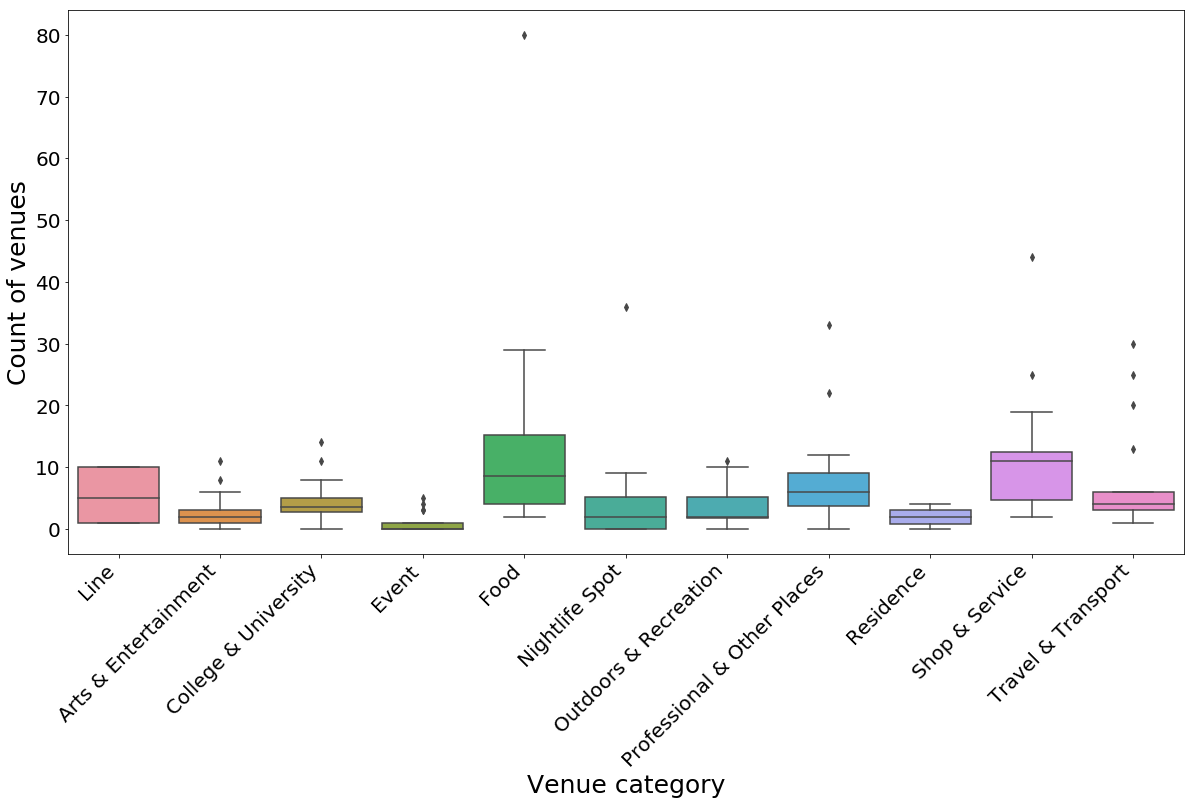

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = stations_venues_df)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

From the plot we can gather the idea that "Food" and "Shop & Service" are the most popular catagories. Lets drop "Event" as it isnt being a value for the exploratory analysis.



In [27]:
stations_venues_df.drop('Event', 1, inplace=True)

In [28]:
categories_list = list(filter(lambda x: x[0] != 'Event', categories_list))


In [29]:
from sklearn.preprocessing import MinMaxScaler

X = stations_venues_df.values[:,4:]
cluster_dataset = MinMaxScaler().fit_transform(X)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0.363636,0.285714,0.320513,0.194444,0.272727,0.121212,0.50,0.547619,0.103448
1,0.000000,0.071429,0.000000,0.000000,0.090909,0.000000,0.00,0.285714,0.000000
2,0.272727,0.214286,0.051282,0.083333,0.181818,0.090909,1.00,0.404762,0.172414
3,1.000000,0.214286,1.000000,1.000000,0.727273,0.666667,0.75,1.000000,0.655172
4,0.090909,0.214286,0.128205,0.138889,0.454545,0.090909,0.50,0.238095,0.103448


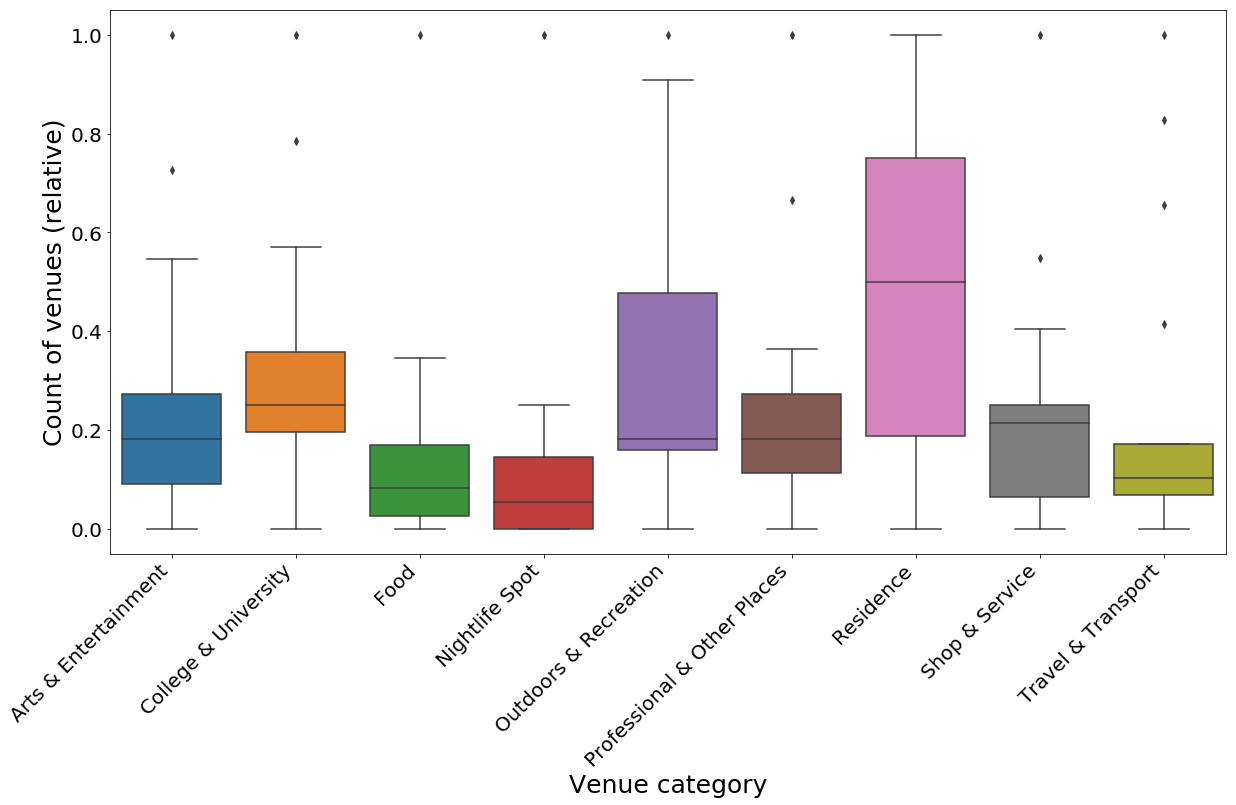

In [31]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()


In [62]:

from sklearn.cluster import KMeans

kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:2, 1:0, 2:3, 3:1}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = stations_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['English name'] = stations_df['English name']
stations_clusters_minmax_df['Coordinates'] = stations_df['Coordinates']


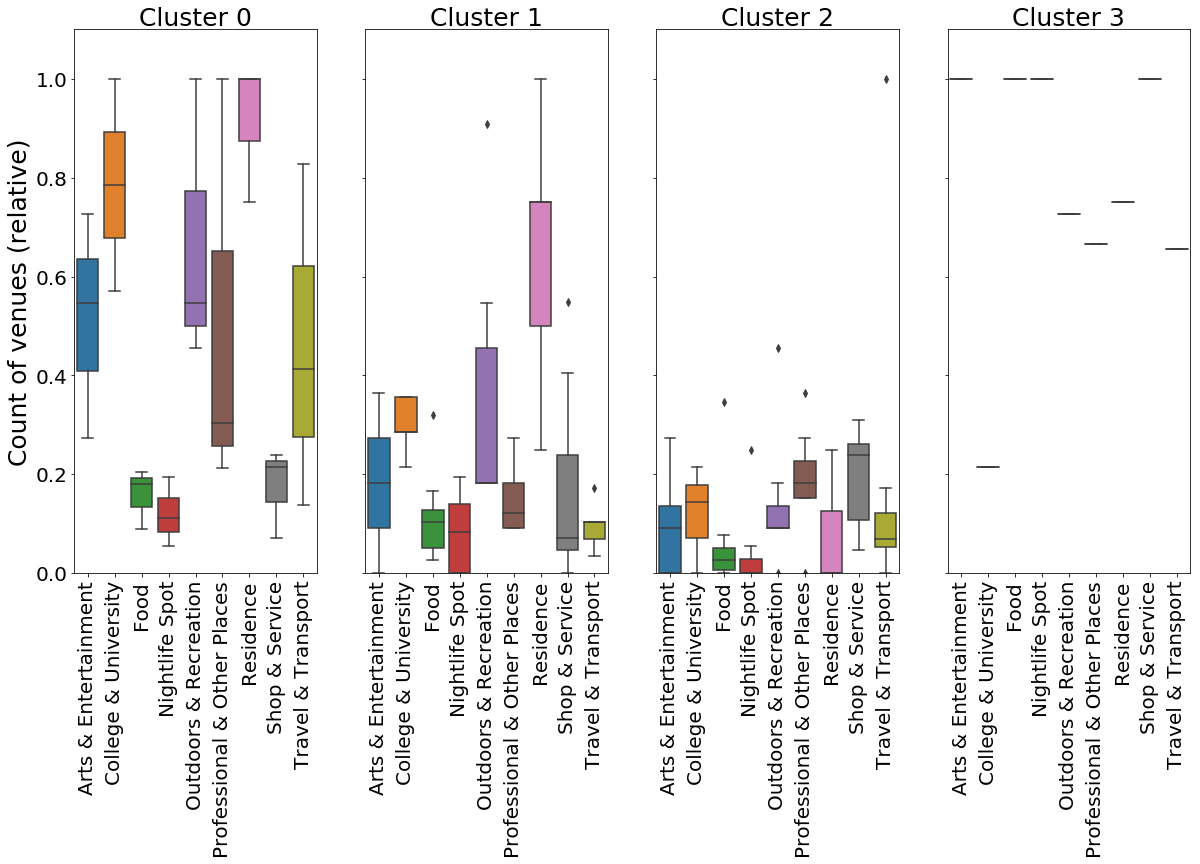

In [63]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()


The Longitude and Latitude values are used to search the neighbourhoods upto 100 meters near the metro stations

In [43]:
map_moscow_metro = folium.Map(location=[28.71642,77.17046], zoom_start=10)

#draw_lines(stations_df, map_moscow_metro, 0.9)

#add markers
for i, station, coordinates, cluster in zip(stations_clusters_minmax_df.index,
                                         stations_clusters_minmax_df['English name'],
                                         stations_clusters_minmax_df['Coordinates'],
                                         stations_clusters_minmax_df['Cluster']):
    latlong = [float(x) for x in coordinates.split(',')]    
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','orange','red']
    #Calculate top 3 categories for each station
    station_series = stations_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = station_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        station,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    folium.CircleMarker(
        latlong,
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[cluster]
    ).add_to(map_moscow_metro)
    
map_moscow_metro

## Results


1) Cluster 0 has an overall high scores for all venue categories. This is the most diversely developed part of the city. (Represented in Blue Blobs)

2) Cluster 1 has highest marks for Residence Places and next highest score was outdoor and recreation. This must be a residential area.(Represented in Green Blobs)

3) Cluster 2 has an overall low marks. Best scores are observed in shop & service.(Represented in Orange Blobs)



## Discussion

It would be great if anyone has found an observaion as i have, When I use the FourSquare API, it has been constantly unstable for me. Some times it works as expected and sometimes it has been a little troublesome. 

## Conclusion

Exploring the foursquare data is limited but, exen with the limitations it was able to achieve the basic strusture of the city with respect to the metro system in the city.